<a href="https://colab.research.google.com/github/hritikakathuria136/Projects/blob/main/arxiv_hypergraph_decade_sorted.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('fullArxivWithOrcidAndCitations.csv', index_col=0, header=0, sep=',')

df = df.sort_values(by='created')
df['year'] = pd.DatetimeIndex(df['created']).year
df = df[pd.DatetimeIndex(df['created']).year >= 1992]


print('printing full dataset')

df.head(30)

<ipython-input-2-6087dfe0bc5a>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('fullArxivWithOrcidAndCitations.csv', index_col=0, header=0, sep=',')


printing full dataset


,id,categories,doi,created,authors,authors_orcid,NumCitationsArxiv,NumReferencesArxiv,year
index,,,,,,,,,
1251137,hep-th/9201004,hep-th,10.1016/0550-3213(92)90591-x,1992-01-02,['berkovits'],NaN,17.0,0.0,1992
1251136,hep-th/9201003,hep-th,NaN,1992-01-02,['dijkgraaf'],NaN,57.0,0.0,1992
1251135,hep-th/9201002,hep-th,10.1103/physrevlett.68.3718,1992-01-02,"['bonechi', 'celeghini', 'giachetti', 'sorace'...",NaN,10.0,0.0,1992
1251138,hep-th/9201005,hep-th,10.1142/s0217732392000690,1992-01-03,['klebanov'],NaN,6.0,0.0,1992
526878,math/9201202,math.fa,NaN,1992-01-05,"['figiel', 'johnson', 'schechtman']",NaN,0.0,0.0,1992
1251140,hep-th/9201007,hep-th,10.1016/0550-3213(92)90649-v,1992-01-05,"['cvetic', 'griffies', 'rey']",NaN,119.0,0.0,1992
1251139,hep-th/9201006,hep-th,10.1016/0370-2693(92)91844-y,1992-01-06,['bernard'],0000-0002-5492-8360,7.0,0.0,1992
526877,math/9201201,math.cv,NaN,1992-01-06,['chirka'],NaN,0.0,0.0,1992
1251141,hep-th/9201008,hep-th,10.1016/0370-2693(92)90479-n,1992-01-07,['matsuda'],NaN,NaN,NaN,1992


In [3]:
len(df)

1455998

In [4]:
# since i dont have enough computing power here, i work w sampled data
df = df.sample(n=100000, random_state=42)

work w initial dataset, on different time periods/stages for information/knowledge exploration

In [5]:
# Define the time periods
periods = {
    '1990-2000': (1990, 2000),
    '2000-2010': (2000, 2010),
    '2010-2020': (2010, 2020)
}

# Split the data into the defined periods
period_data = {key: df[(df['year'] >= start) & (df['year'] < end)] for key, (start, end) in periods.items()}

In [6]:
def create_hypergraph(df):
    """
    Create a hypergraph from the DataFrame based on article categories.

    Parameters:
    - df (DataFrame): The DataFrame containing article data.

    Returns:
    - hypergraph (list): A list of lists representing hyperedges in the hypergraph.
    """
    hypergraph = []
    for _, row in df.iterrows():
        tags = row['categories'].split()
        hypergraph.append(tags)
    return hypergraph

# Create hypergraphs for each period
hypergraphs = {key: create_hypergraph(data) for key, data in period_data.items()}


In [7]:
hypergraphs

{'1990-2000': [['cond-mat.mtrl-sci', 'cond-mat.stat-mech'],
  ['nucl-th'],
  ['hep-lat', 'hep-th'],
  ['cond-mat', 'q-bio'],
  ['hep-ph'],
  ['hep-ph', 'astro-ph'],
  ['hep-lat'],
  ['nucl-th'],
  ['hep-th', 'hep-ph'],
  ['astro-ph'],
  ['astro-ph'],
  ['quant-ph'],
  ['hep-th'],
  ['cond-mat.stat-mech', 'cond-mat.mtrl-sci'],
  ['hep-ph'],
  ['nucl-th'],
  ['astro-ph'],
  ['hep-ph'],
  ['quant-ph'],
  ['cond-mat'],
  ['cond-mat.str-el', 'cond-mat.supr-con'],
  ['q-alg', 'math.qa'],
  ['gr-qc', 'hep-th'],
  ['hep-th', 'hep-lat', 'hep-ph'],
  ['gr-qc'],
  ['quant-ph'],
  ['math.oc', 'math.ds'],
  ['nucl-th'],
  ['astro-ph'],
  ['q-alg', 'hep-th', 'math.qa'],
  ['nucl-th'],
  ['astro-ph'],
  ['cond-mat.supr-con', 'cond-mat.str-el'],
  ['hep-ph'],
  ['cond-mat.mes-hall'],
  ['q-alg', 'math.qa'],
  ['gr-qc'],
  ['cond-mat.str-el'],
  ['cond-mat.mes-hall', 'hep-th', 'quant-ph'],
  ['astro-ph'],
  ['cond-mat'],
  ['math.lo'],
  ['hep-ex'],
  ['astro-ph'],
  ['hep-lat'],
  ['hep-ph'],
  ['hep-

# Motif Analysis

In [8]:
import csv
import ast
from collections import Counter
import matplotlib.pyplot as plt
from itertools import combinations
import time

def analyze_hypergraph(hypergraph):
  """
  Analyzes a hypergraph structure and returns motif counts and optionally the graph (based on your definition).

  Returns:
      dict: A dictionary containing:
          - 'motif_counts': Counts of various hypergraph motifs (triples, duples, etc.).
          - 'graph' (optional): The graph representation of the hypergraph (definition depends on your use case).
  """

  # Function to read hypergraph from CSV (if needed)
  def read_hypergraph_from_csv(filename):
    edges = []
    with open(filename, 'r', encoding='utf-8') as file:
      for line in file:
        edge = ast.literal_eval(line.strip())
        edges.append(tuple(edge))
    return edges

  # Data Preprocessing
  def parse_hypergraph(hypergraph):
    edges = []
    for edge in hypergraph:
      edges.append(tuple(sorted(edge)))
    return edges


  # Functions to find specific hyperedge structures
  def find_triples(edges):
    triples = []
    start_time = time.perf_counter()
    for edge in edges:
      if len(edge) == 3:
        triples.append(edge)
    end_time = time.perf_counter()
    computation_time = end_time - start_time
    return triples, computation_time

  def find_duples(edges):
    duples = []
    start_time = time.perf_counter()
    for edge in edges:
      if len(edge) == 2:
        duples.append(edge)
    end_time = time.perf_counter()
    computation_time = end_time - start_time
    return duples, computation_time


# check the lollipop function
  def find_intersecting_triple_lollipop(triples, duples):
    intersecting = []
    start_time = time.perf_counter()
    for i in range(len(triples)):
      for j in range(len(duples)):
        intersection = set(triples[i]).intersection(duples[j])
        if len(intersection) == 1:
          intersecting.append(tuple(sorted(list(intersection) + list(set(triples[i] + duples[j]) - intersection))))
    end_time = time.perf_counter()
    computation_time = end_time - start_time
    intersecting = list(set(intersecting))
    return intersecting, computation_time

  # def find_circles(edges):
  #   circles = []
  #   start_time = time.perf_counter()
  #   for edge in edges:
  #       if len(edge) == 4:
  #           subedges = [(edge[i], edge[(i + 1) % 4]) for i in range(4)]
  #           if all(set(subedge) in [set(e) for e in edges] for subedge in subedges):
  #               circles.append(tuple(edge))
  #   end_time = time.perf_counter()
  #   computation_time = end_time - start_time
  #   return circles, computation_time

  def find_quadruples(edges):
    quadruples = []
    start_time = time.perf_counter()
    for edge in edges:
        if len(edge) == 4:
            quadruples.extend(combinations(edge, 4))
    end_time = time.perf_counter()
    computation_time = end_time - start_time
    return quadruples, computation_time

    # Motif Counting
  def count_motifs(edges):
    triples, time_triples = find_triples(edges)
    duples, time_duples = find_duples(edges)
    lollipop, time_lollipop = find_intersecting_triple_lollipop(triples, duples)
    # circles, time_circles = find_circles(edges)
    quadruples, time_quadruples = find_quadruples(edges)
    motif_counts = {
      "Edges": len(edges),
      "Triples": len(triples),
      "Edge sharing nodes": len(duples),
      "Lollipop": len(lollipop),
      # "Circles":len(circles),
      "Quadruples": len(quadruples),
    }
    computation_times = {
      "Triples": time_triples,
      "Edge sharing nodes/duples": time_duples,
      "Lollipop": time_lollipop,
      # "Circles": time_circles,
      "Quadruples": time_quadruples,
    }
    return motif_counts, computation_times


  # Process the hypergraph data
  edges = parse_hypergraph(hypergraph)  # Assuming hypergraph_data is the input list of edges
  # edges = edges[0]



  # Find motifs and counts
  motif_counts, computation_times = count_motifs(edges)

  graph = None  # Placeholder, replace with your graph generation logic

  # Return results
  return {
      "motif_counts": motif_counts,
      "graph": graph,  # Update with actual graph if implemented
      "computation_times": computation_times,
  }



# result = analyze_hypergraph('/content/hyperedges_list_arxiv_test.csv')



In [9]:
result = {key: analyze_hypergraph(hypergraph) for key, hypergraph in hypergraphs.items()}

# Output the results
for period, motifs in result.items():
    print(f"Motifs in period {period}: {motifs}")

    if "motif_counts" in motifs:
        print("Motif Counts:", motifs["motif_counts"])

        plt.bar(motifs["motif_counts"].keys(), motifs["motif_counts"].values())
        plt.xlabel('Motif')
        plt.ylabel('Count')
        plt.title(f'Motif Analysis of Hypergraph ({period})')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    if "computation_times" in motifs:
        print("Computation Times:", motifs["computation_times"])

KeyboardInterrupt: 

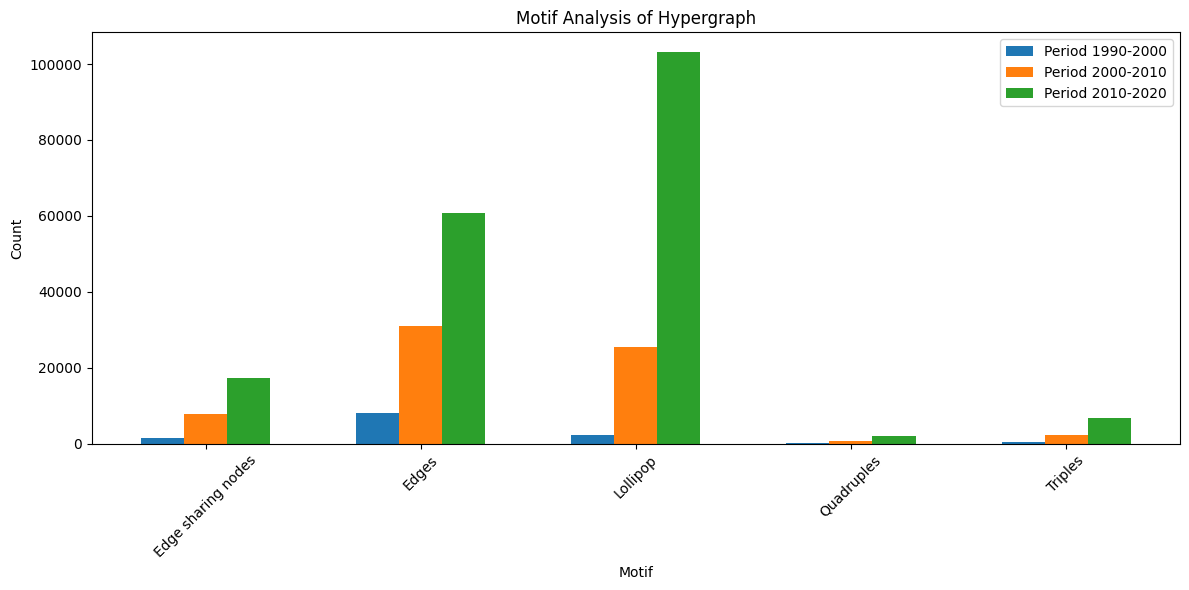

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Generate the results
result = {key: analyze_hypergraph(hypergraph) for key, hypergraph in hypergraphs.items()}

# Collect all unique motifs across all periods
all_motifs = set()
for motifs in result.values():
    all_motifs.update(motifs.get("motif_counts", {}).keys())

all_motifs = sorted(all_motifs)  # Sort the motifs for consistent ordering
n_motifs = len(all_motifs)
n_periods = len(result)

# Create a new figure
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust the figure size as needed

# Define the width of each bar and the positions of the bars
bar_width = 0.2
indices = np.arange(n_motifs)

# Plot the bars for each period
for i, (period, motifs) in enumerate(result.items()):
    counts = [motifs.get("motif_counts", {}).get(motif, 0) for motif in all_motifs]
    bar_positions = indices + i * bar_width
    ax.bar(bar_positions, counts, bar_width, label=f'Period {period}')

# Set the labels and title
ax.set_xlabel('Motif')
ax.set_ylabel('Count')
ax.set_title('Motif Analysis of Hypergraph')
ax.set_xticks(indices + bar_width * (n_periods - 1) / 2)
ax.set_xticklabels(all_motifs, rotation=45)
ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()


Computation Times for period 1990-2000: {'Triples': 0.0008730310000828467, 'Edge sharing nodes/duples': 0.0008287560001463135, 'Lollipop': 0.49252135100005034, 'Quadruples': 0.0010919920000560523}
Computation Times for period 2000-2010: {'Triples': 0.0034237410000059754, 'Edge sharing nodes/duples': 0.0036292360000516055, 'Lollipop': 13.814301303000093, 'Quadruples': 0.004356487999984893}
Computation Times for period 2010-2020: {'Triples': 0.0069357540000964946, 'Edge sharing nodes/duples': 0.007092828000168083, 'Lollipop': 89.00029715300002, 'Quadruples': 0.008057206000103179}


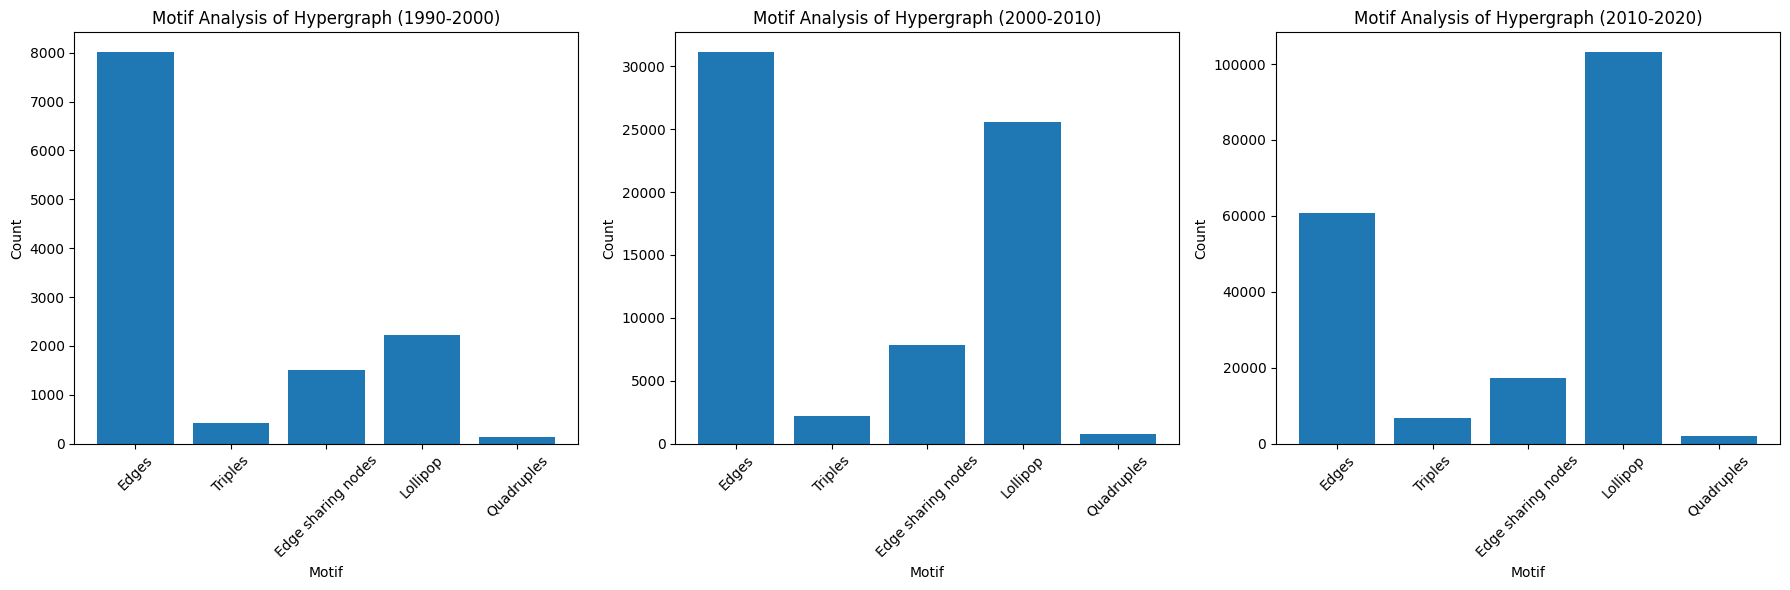

In [10]:
import matplotlib.pyplot as plt

# Generate the results
result = {key: analyze_hypergraph(hypergraph) for key, hypergraph in hypergraphs.items()}

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # Adjust the number of subplots and the figure size as needed

# Loop through the results and plot them on the subplots
for i, (period, motifs) in enumerate(result.items()):
    axs[i].set_title(f'Motif Analysis of Hypergraph ({period})')

    if "motif_counts" in motifs:
        axs[i].bar(motifs["motif_counts"].keys(), motifs["motif_counts"].values())
        axs[i].set_xlabel('Motif')
        axs[i].set_ylabel('Count')
        axs[i].tick_params(axis='x', rotation=45)

    if "computation_times" in motifs:
        print(f"Computation Times for period {period}:", motifs["computation_times"])

# Adjust layout
plt.tight_layout()
plt.show()


# configuration model

In [11]:
!pip install xgi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.6/184.6 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for xgi: filename=xgi-0.8.6-py3-none-any.whl size=144253 sha256=5d1cccb4fb1dc9dee56393351232109da61aa723c4f91637d461e6029fc48cfb
  Stored in directory: /root/.cache/pip/wheels/82/34/d0/d94a2db9afbcd2b2b1f58bb01828b4a257ab5b88010a23189a
Successfully built xgi


In [12]:
import xgi
import random


In [13]:
def convert_to_hypergraph(data):
    """
    Convert a list of edges to an xgi.Hypergraph object.
    """
    return xgi.Hypergraph(data)

def load_hypergraphs(hypergraph_data):
    """
    Load hypergraphs from given data.
    """
    hypergraphs = {period: convert_to_hypergraph(edges) for period, edges in hypergraph_data.items()}
    return hypergraphs

def print_hypergraph_info(hypergraphs):
    for period, hg in hypergraphs.items():
        print(f"Period: {period}")
        print(f"Edges: {list(hg.edges)}")
        print(f"Nodes: {list(hg.nodes)}")



hypergraphs = load_hypergraphs(hypergraphs)

# Print original hypergraph info
print("Original Hypergraphs:")
print_hypergraph_info(hypergraphs)

Original Hypergraphs:
Period: 1990-2000
Edges: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 21

In [14]:
def hypergraph_to_nested_list(hypergraph):
    """
    Convert an xgi.Hypergraph object back to a nested list of edges.
    """
    return [list(edge) for edge in hypergraph.edges.members()]


In [15]:
import random

def reshuffle_hypergraph(hypergraph, n_swaps=1000):
    """
    Perform edge swaps to reshuffle the hypergraph.
    """
    edges = list(hypergraph.edges)
    nodes = list(hypergraph.nodes)

    for _ in range(n_swaps):
        e_id1, e_id2 = random.sample(edges, 2)  # Randomly select two different edges
        n_id1 = random.choice(list(hypergraph.edges.members(e_id1)))  # Randomly select a node from the first edge
        n_id2 = random.choice(list(hypergraph.edges.members(e_id2)))  # Randomly select a node from the second edge

        try:
            hypergraph.double_edge_swap(n_id1, n_id2, e_id1, e_id2)  # Swap the nodes between edges
        except xgi.exception.XGIError:
            # If the swap is invalid, continue with the next iteration
            continue

    return hypergraph


In [16]:
def compare_results(original, reshuffled):
    for period in original.keys():
        print(f"Period: {period}")
        print("Original motifs:")
        print(original[period])
        print("Reshuffled motifs:")
        print(reshuffled[period])
        print()


In [17]:
import matplotlib.pyplot as plt

def plot_comparison(original_results, reshuffled_results, metric='Edges'):
    periods = sorted(original_results.keys())  # Assuming periods are sorted

    original_values = [original_results[period][metric] for period in periods]
    reshuffled_values = [reshuffled_results[period][metric] for period in periods]

    fig, ax = plt.subplots(figsize=(10, 6))
    bar_width = 0.35
    index = range(len(periods))

    original_bars = ax.bar(index, original_values, bar_width, label='Original')
    reshuffled_bars = ax.bar([i + bar_width for i in index], reshuffled_values, bar_width, label='Reshuffled')

    ax.set_xlabel('Period')
    ax.set_ylabel(metric)
    ax.set_title(f'{metric} Comparison Between Original and Reshuffled Hypergraphs')
    ax.set_xticks([i + bar_width / 2 for i in index])
    ax.set_xticklabels(periods)
    ax.legend()

    plt.tight_layout()
    plt.show()


In [22]:


periods = {
'1990-2000': (1990, 2000),
'2000-2010': (2000, 2010),
'2010-2020': (2010, 2020)
}
original_results = {}
for period, hg in hypergraphs.items():
  nested_list_hg = hypergraph_to_nested_list(hg)
  original_results[period] = analyze_hypergraph(nested_list_hg)
# Reshuffle and analyze hypergraphs
reshuffled_hypergraphs = {period: reshuffle_hypergraph(hg.copy()) for period, hg in hypergraphs.items()}

# Print reshuffled hypergraph info
print("Reshuffled Hypergraphs:")
print_hypergraph_info(reshuffled_hypergraphs)

reshuffled_results = {}
for period, hg in reshuffled_hypergraphs.items():
    nested_list_hg = hypergraph_to_nested_list(hg)
    reshuffled_results[period] = analyze_hypergraph(nested_list_hg)

# Compare results
compare_results(original_results, reshuffled_results)



Reshuffled Hypergraphs:
Period: 1990-2000
Edges: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 

In [24]:
plot_comparison(original_results, reshuffled_results, metric='Edges')
plot_comparison(original_results, reshuffled_results, metric='Triples')


KeyError: 'Edges'

In [26]:


# def analyze_hypergraphs(hypergraphs):
#     # Analyze motifs in hypergraphs
#     results = {}
#     for period, hg in hypergraphs.items():
#         results[period] = analyze_hypergraph(hg)
#     return results


# Analyze original hypergraphs
original_results = {}
for period, hg in hypergraphs.items():
  nested_list_hg = hypergraph_to_nested_list(hg)
  original_results[period] = analyze_hypergraph(nested_list_hg)

def main():
    periods = {
    '1990-2000': (1990, 2000),
    '2000-2010': (2000, 2010),
    '2010-2020': (2010, 2020)
    }

    # hypergraphs = load_hypergraphs(periods)

    # Analyze original hypergraphs
    original_results = analyze_hypergraphs(hypergraphs)

    # Reshuffle and analyze hypergraphs
    reshuffled_hypergraphs = {period: reshuffle_hypergraph(hg.copy()) for period, hg in hypergraphs.items()}
    reshuffled_results = analyze_hypergraphs(reshuffled_hypergraphs)

    # Compare results
    compare_results(original_results, reshuffled_results)

def compare_results(original, reshuffled):
    for period in original.keys():
        print(f"Period: {period}")
        print("Original motifs:")
        print(original[period])
        print("Reshuffled motifs:")
        print(reshuffled[period])
        print()

if __name__ == "__main__":
    main()


Period: 1990-2000
Original motifs:
{'motif_counts': {'Edges': 122, 'Triples': 0, 'Edge sharing nodes': 0, 'Lollipop': 0, 'Quadruples': 43293}, 'graph': None, 'computation_times': {'Triples': 1.927900029841112e-05, 'Edge sharing nodes/duples': 1.743199982229271e-05, 'Lollipop': 1.98600037037977e-06, 'Quadruples': 0.007867939999869122}}
Reshuffled motifs:
{'motif_counts': {'Edges': 122, 'Triples': 0, 'Edge sharing nodes': 0, 'Lollipop': 0, 'Quadruples': 43293}, 'graph': None, 'computation_times': {'Triples': 2.7457999749458395e-05, 'Edge sharing nodes/duples': 1.9409999822528334e-05, 'Lollipop': 1.97000008483883e-06, 'Quadruples': 0.027397643999847787}}

Period: 2000-2010
Original motifs:
{'motif_counts': {'Edges': 147, 'Triples': 0, 'Edge sharing nodes': 0, 'Lollipop': 0, 'Quadruples': 49254}, 'graph': None, 'computation_times': {'Triples': 2.4994999876071233e-05, 'Edge sharing nodes/duples': 2.3019999844109407e-05, 'Lollipop': 2.0990000848541968e-06, 'Quadruples': 0.010079743000005692}

In [ ]:
def create_null_model(hypergraph):
  """
  Creates a null model of the hypergraph by reshuffling edges.

  Args:
      hypergraph (xgi.core.hypergraph.Hypergraph): The original hypergraph.

  Returns:
      xgi.core.hypergraph.Hypergraph: The null model with reshuffled edges.
  """
  null_graph = Hypergraph()  # Create a new hypergraph object for the null model
  null_graph.add_nodes_from(hypergraph.nodes)  # Copy nodes from the original hypergraph
  edges = list(hypergraph.edges)  # Get a copy of the edges

  # Reshuffle edges using double_edge_swap (assuming it works like this)
  for _ in range(len(edges)):  # Number of shuffles can be adjusted
    i, j = random.sample(range(len(edges)), 2)  # Pick two random edges
    null_graph.add_hyperedge(*xgi.core.hypergraph.utils.swap_edges(edges[i], edges[j]))

  return null_graph


In [ ]:
original_counts = analyze_hypergraph(hypergraph)
null_model = create_null_model(hypergraph)
null_counts = analyze_hypergraph(null_model)

# Compare motif counts between original and null model (statistical tests can be applied)


In [25]:
original_results

{'1990-2000': {'motif_counts': {'Edges': 8015,
   'Triples': 429,
   'Edge sharing nodes': 1504,
   'Lollipop': 2235,
   'Quadruples': 142},
  'graph': None,
  'computation_times': {'Triples': 0.001544021999961842,
   'Edge sharing nodes/duples': 0.0014284119999956602,
   'Lollipop': 0.9149128059998475,
   'Quadruples': 0.0018029079999450914}},
 '2000-2010': {'motif_counts': {'Edges': 31131,
   'Triples': 2199,
   'Edge sharing nodes': 7853,
   'Lollipop': 25545,
   'Quadruples': 755},
  'graph': None,
  'computation_times': {'Triples': 0.00580358599995634,
   'Edge sharing nodes/duples': 0.006378141999903164,
   'Lollipop': 12.790247109999882,
   'Quadruples': 0.006466813000088223}},
 '2010-2020': {'motif_counts': {'Edges': 60854,
   'Triples': 6794,
   'Edge sharing nodes': 17424,
   'Lollipop': 103187,
   'Quadruples': 2130},
  'graph': None,
  'computation_times': {'Triples': 0.015359526000111146,
   'Edge sharing nodes/duples': 0.01422584400006599,
   'Lollipop': 90.63854210300019

Motif: Edges
  Period: 1990-2000, z-score: -1.17, p-value: 0.2417
  Period: 2000-2010, z-score: -0.10, p-value: 0.9189
  Period: 2010-2020, z-score: 1.27, p-value: 0.2032
Motif: Triples
  Period: 1990-2000, z-score: -1.01, p-value: 0.3121
  Period: 2000-2010, z-score: -0.35, p-value: 0.7256
  Period: 2010-2020, z-score: 1.36, p-value: 0.1732
Motif: Edge sharing nodes
  Period: 1990-2000, z-score: -1.13, p-value: 0.2566
  Period: 2000-2010, z-score: -0.16, p-value: 0.8696
  Period: 2010-2020, z-score: 1.30, p-value: 0.1941
Motif: Lollipop
  Period: 1990-2000, z-score: -1.03, p-value: 0.3018
  Period: 2000-2010, z-score: -0.64, p-value: 0.5226
  Period: 2010-2020, z-score: 0.67, p-value: 0.5028
Motif: Quadruples
  Period: 1990-2000, z-score: -1.04, p-value: 0.2969
  Period: 2000-2010, z-score: -0.31, p-value: 0.7599
  Period: 2010-2020, z-score: 1.35, p-value: 0.1775


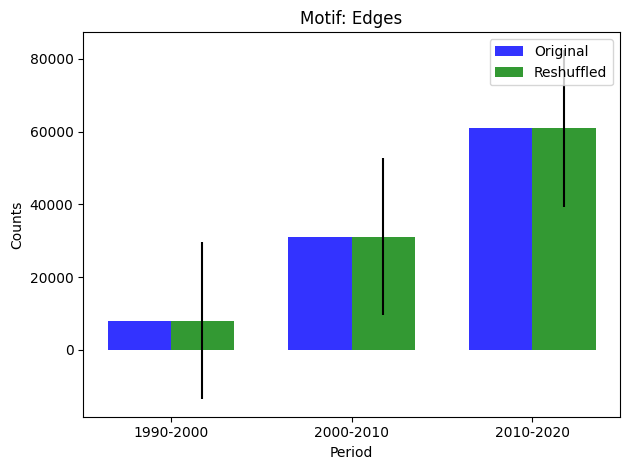

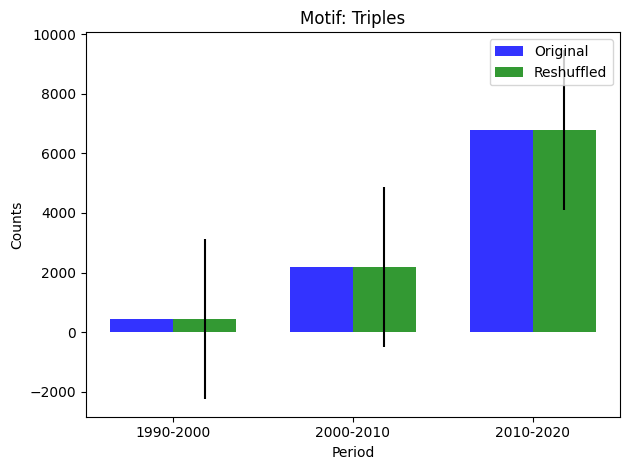

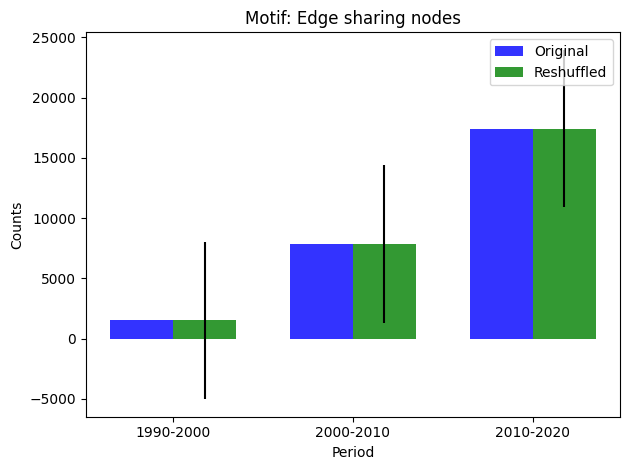

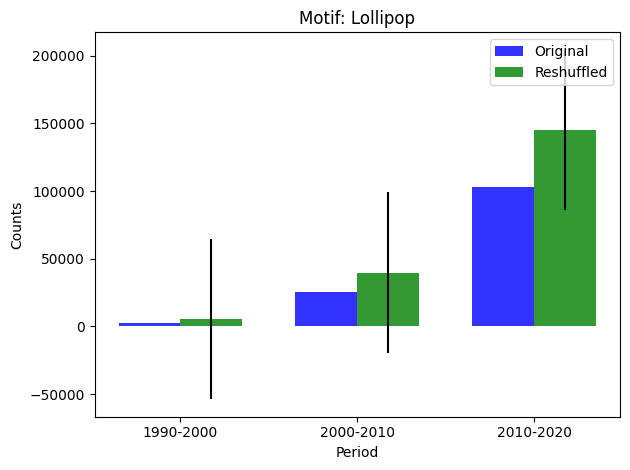

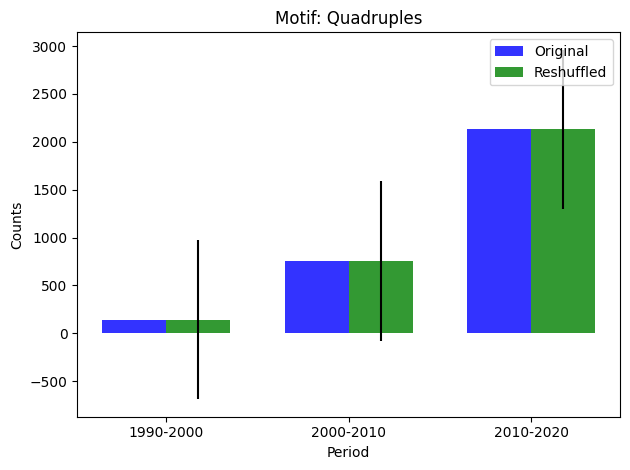

In [26]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

periods = ['1990-2000', '2000-2010', '2010-2020']

def calculate_significance(original_results, reshuffled_results):
    results = {}
    periods = original_results.keys()
    motifs = original_results[next(iter(periods))]['motif_counts'].keys()

    for motif in motifs:
        X_orig = np.array([original_results[period]['motif_counts'][motif] for period in periods])
        X_reshuffled = np.array([reshuffled_results[period]['motif_counts'][motif] for period in periods])

        mu_reshuffle = np.mean(X_reshuffled)
        sigma_reshuffle = np.std(X_reshuffled)

        # Handle cases where sigma_reshuffle is zero to avoid division by zero
        if sigma_reshuffle == 0:
            z_scores = np.zeros_like(X_orig)
            p_values = np.ones_like(X_orig)
        else:
            z_scores = (X_orig - mu_reshuffle) / sigma_reshuffle
            p_values = 2 * (1 - norm.cdf(np.abs(z_scores)))  # two-tailed test

        results[motif] = {
            "z_scores": z_scores,
            "p_values": p_values,
            "means": mu_reshuffle,
            "std_devs": sigma_reshuffle
        }
    return results

# Calculate significance for each motif
significance_results = calculate_significance(original_results, reshuffled_results)

# Output results
for motif, stats in significance_results.items():
    print(f"Motif: {motif}")
    for period, z, p in zip(periods, stats["z_scores"], stats["p_values"]):
        print(f"  Period: {period}, z-score: {z:.2f}, p-value: {p:.4f}")

# Plotting
for motif, stats in significance_results.items():
    means = stats["means"]
    std_devs = stats["std_devs"]

    fig, ax = plt.subplots()
    index = np.arange(len(periods))
    bar_width = 0.35
    opacity = 0.8

    orig_values = np.array([original_results[period]['motif_counts'][motif] for period in periods])
    reshuffled_values = np.array([reshuffled_results[period]['motif_counts'][motif] for period in periods])

    bars1 = ax.bar(index, orig_values, bar_width,
                   alpha=opacity, color='b', label='Original')

    bars2 = ax.bar(index + bar_width, reshuffled_values, bar_width,
                   alpha=opacity, color='g', yerr=std_devs, label='Reshuffled')

    ax.set_xlabel('Period')
    ax.set_ylabel('Counts')
    ax.set_title(f'Motif: {motif}')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(periods)
    ax.legend()

    plt.tight_layout()
    plt.show()


Motif: Edges
  Period: 1990-2000, z-score: -1.17, p-value: 0.2417
  Period: 2000-2010, z-score: -0.10, p-value: 0.9189
  Period: 2010-2020, z-score: 1.27, p-value: 0.2032
Motif: Triples
  Period: 1990-2000, z-score: -1.01, p-value: 0.3121
  Period: 2000-2010, z-score: -0.35, p-value: 0.7256
  Period: 2010-2020, z-score: 1.36, p-value: 0.1732
Motif: Edge sharing nodes
  Period: 1990-2000, z-score: -1.13, p-value: 0.2566
  Period: 2000-2010, z-score: -0.16, p-value: 0.8696
  Period: 2010-2020, z-score: 1.30, p-value: 0.1941
Motif: Lollipop
  Period: 1990-2000, z-score: -1.04, p-value: 0.2969
  Period: 2000-2010, z-score: -0.64, p-value: 0.5215
  Period: 2010-2020, z-score: 0.70, p-value: 0.4853
Motif: Quadruples
  Period: 1990-2000, z-score: -1.04, p-value: 0.2969
  Period: 2000-2010, z-score: -0.31, p-value: 0.7599
  Period: 2010-2020, z-score: 1.35, p-value: 0.1775


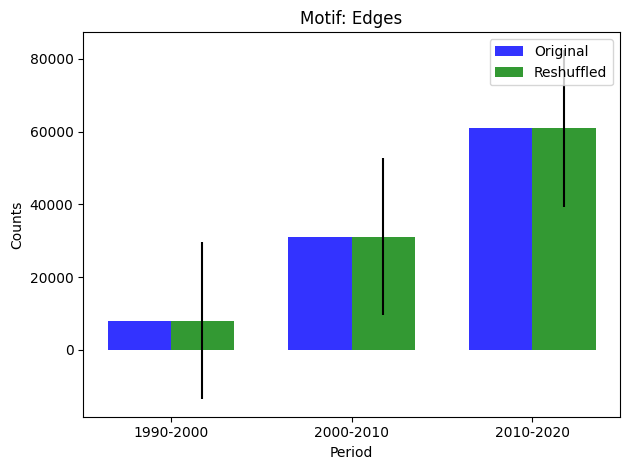

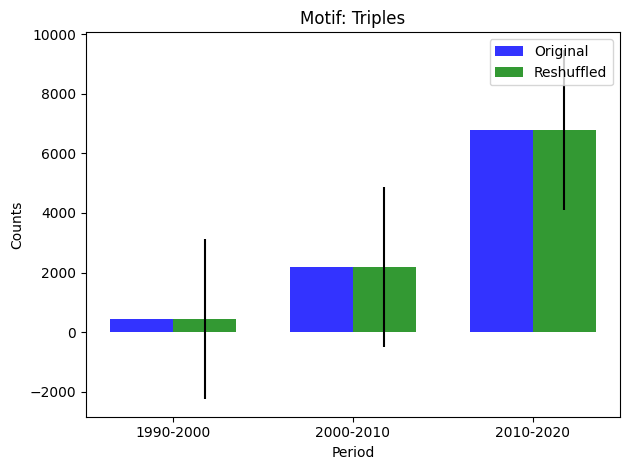

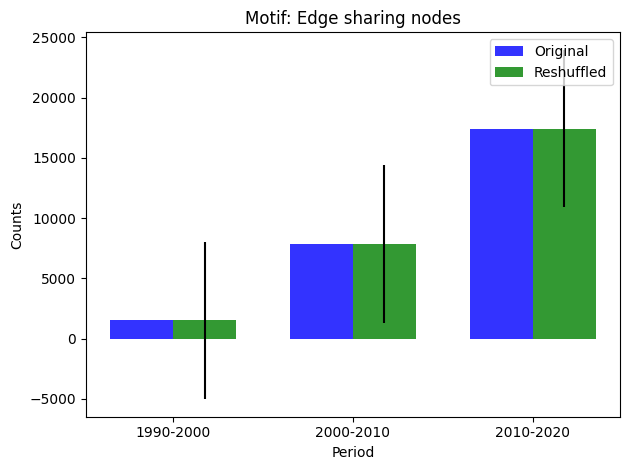

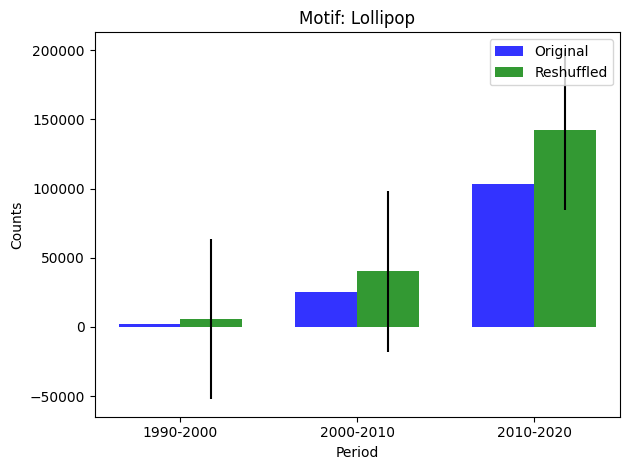

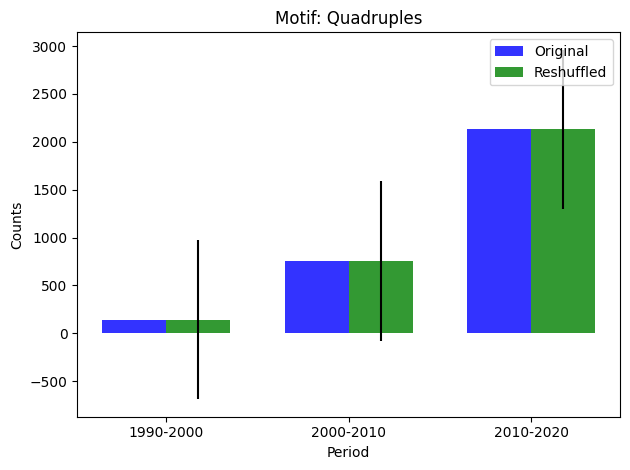

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Data input
periods = ["1990-2000", "2000-2010", "2010-2020"]
original_motifs = [
    {'Edges': 8015, 'Triples': 429, 'Edge sharing nodes': 1504, 'Lollipop': 2235, 'Quadruples': 142},
    {'Edges': 31131, 'Triples': 2199, 'Edge sharing nodes': 7853, 'Lollipop': 25545, 'Quadruples': 755},
    {'Edges': 60854, 'Triples': 6794, 'Edge sharing nodes': 17424, 'Lollipop': 103187, 'Quadruples': 2130}
]
reshuffled_motifs = [
    {'Edges': 8015, 'Triples': 429, 'Edge sharing nodes': 1504, 'Lollipop': 5704, 'Quadruples': 142},
    {'Edges': 31131, 'Triples': 2199, 'Edge sharing nodes': 7853, 'Lollipop': 40181, 'Quadruples': 755},
    {'Edges': 60854, 'Triples': 6794, 'Edge sharing nodes': 17424, 'Lollipop': 142274, 'Quadruples': 2130}
]

# Function to calculate z-scores and p-values
def calculate_significance(orig, reshuffled):
    results = {}
    motifs = orig[0].keys()  # Extract keys from the first dictionary

    for motif in motifs:
        X_orig = np.array([p[motif] for p in orig])
        X_reshuffled = np.array([p[motif] for p in reshuffled])

        mu_reshuffle = np.mean(X_reshuffled)
        sigma_reshuffle = np.std(X_reshuffled)

        # Handle cases where sigma_reshuffle is zero to avoid division by zero
        if sigma_reshuffle == 0:
            z_scores = np.zeros_like(X_orig)
            p_values = np.ones_like(X_orig)
        else:
            z_scores = (X_orig - mu_reshuffle) / sigma_reshuffle
            p_values = 2 * (1 - norm.cdf(np.abs(z_scores)))  # two-tailed test

        results[motif] = {
            "z_scores": z_scores,
            "p_values": p_values,
            "means": mu_reshuffle,
            "std_devs": sigma_reshuffle
        }
    return results

# Calculate significance for each motif
significance_results = calculate_significance(original_motifs, reshuffled_motifs)

# Output results
for motif, stats in significance_results.items():
    print(f"Motif: {motif}")
    for period, z, p in zip(periods, stats["z_scores"], stats["p_values"]):
        print(f"  Period: {period}, z-score: {z:.2f}, p-value: {p:.4f}")

# Plotting
for motif, stats in significance_results.items():
    means = stats["means"]
    std_devs = stats["std_devs"]

    fig, ax = plt.subplots()
    index = np.arange(len(periods))
    bar_width = 0.35
    opacity = 0.8

    orig_values = np.array([p[motif] for p in original_motifs])
    reshuffled_values = np.array([p[motif] for p in reshuffled_motifs])

    bars1 = ax.bar(index, orig_values, bar_width,
                   alpha=opacity, color='b', label='Original')

    bars2 = ax.bar(index + bar_width, reshuffled_values, bar_width,
                   alpha=opacity, color='g', yerr=std_devs, label='Reshuffled')

    ax.set_xlabel('Period')
    ax.set_ylabel('Counts')
    ax.set_title(f'Motif: {motif}')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(periods)
    ax.legend()

    plt.tight_layout()
    plt.show()


In [ ]:
import itertools
import time


def find_clean_quadruples(edges):
    # Create a set of all nodes in the hypergraph
    nodes = set()
    for edge in edges:
        for node in edge:
            nodes.add(node)

    # Generate all possible quadruples
    quadruples = list(itertools.combinations(nodes, 4))

    # Create a set of edges for quick lookup
    edge_set = set(tuple(sorted(edge)) for edge in edges)

    # Function to check if a quadruple is clean
    def is_clean_quadruple(quadruple):
        for (u, v) in itertools.combinations(quadruple, 2):
            if tuple(sorted([u, v])) in edge_set:
                return False
        return True

    # Filter clean quadruples
    clean_quadruples = [quad for quad in quadruples if is_clean_quadruple(quad)]

    return clean_quadruples